In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wineData = pd.read_csv('winequality-red.csv')

### Exploring dataset

In [3]:
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print("No. of Duplicates : " + str(wineData.duplicated().sum()))

No. of Duplicates : 240


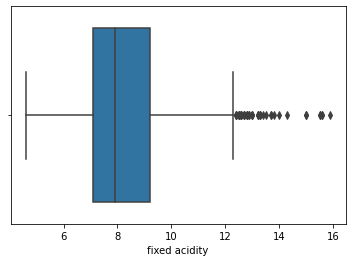

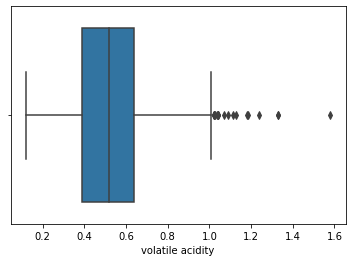

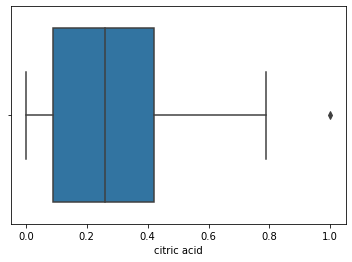

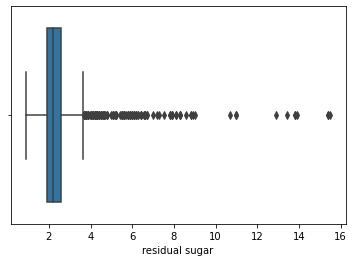

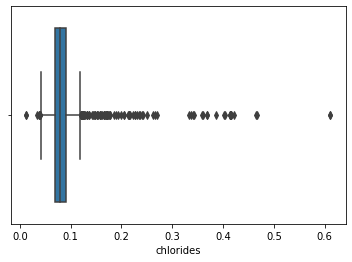

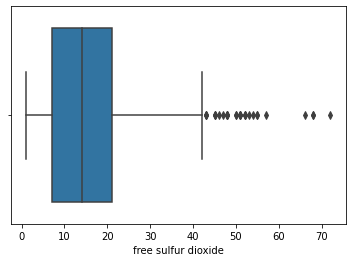

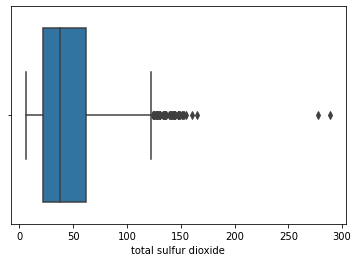

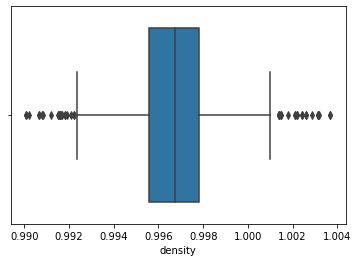

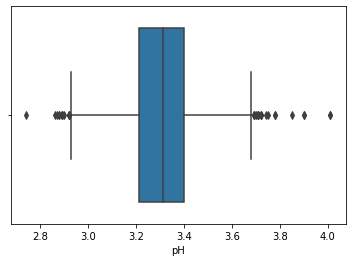

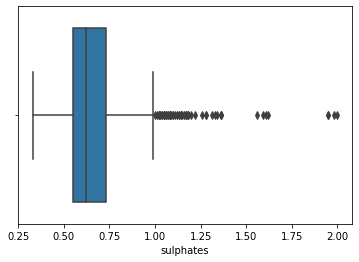

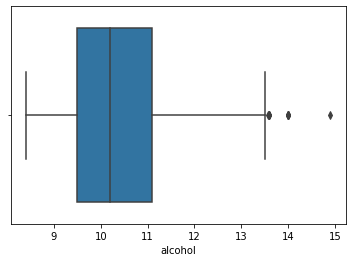

In [6]:
for feature in wineData.columns[:-1]:
    plt.figure()
    sns.boxplot(x = feature, data = wineData)

- 240 duplicate entries
- outliers are present in the feature's data distribution
- No missing observations
- No structural errors

In [7]:
wineData = wineData.drop_duplicates()
wineData['quality'].count()

1359

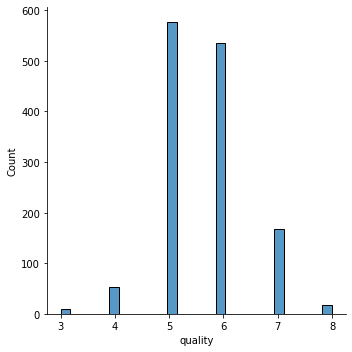

In [8]:
y = wineData['quality']
sns.displot(y)

<AxesSubplot:xlabel='quality'>

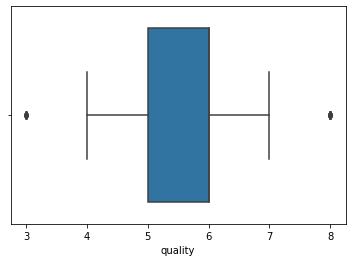

In [9]:
sns.boxplot(x = 'quality', data = wineData)

### Outliers 

Total outliers for fixed acidity feature : 41
Total outliers for volatile acidity feature : 19
Total outliers for citric acid feature : 1
Total outliers for residual sugar feature : 126
Total outliers for chlorides feature : 87
Total outliers for free sulfur dioxide feature : 26
Total outliers for total sulfur dioxide feature : 45
Total outliers for density feature : 35
Total outliers for pH feature : 28
Total outliers for sulphates feature : 55
Total outliers for alcohol feature : 12


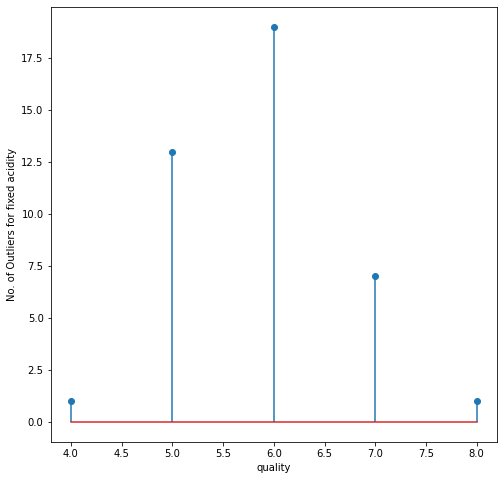

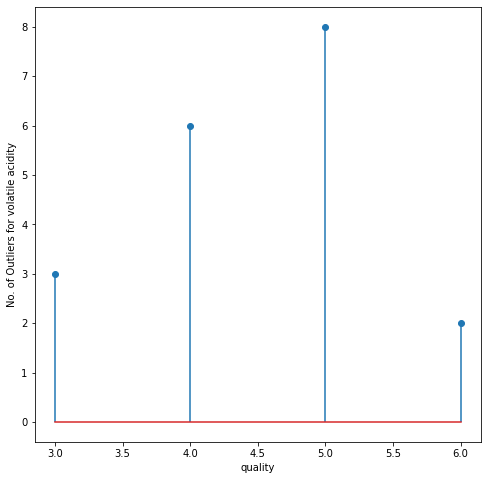

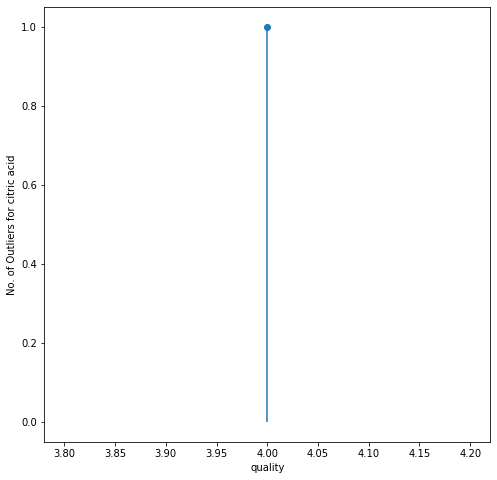

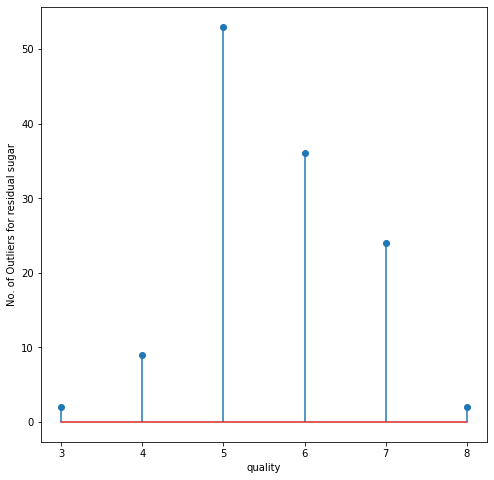

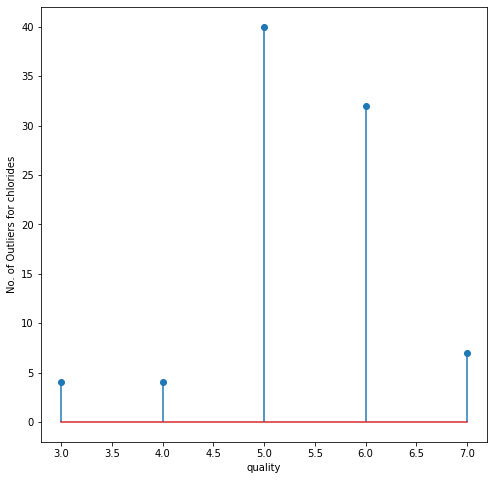

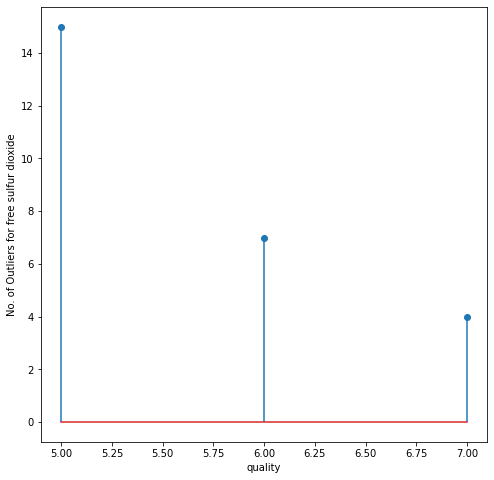

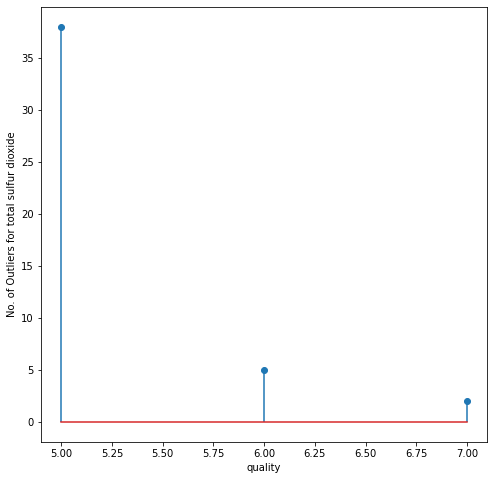

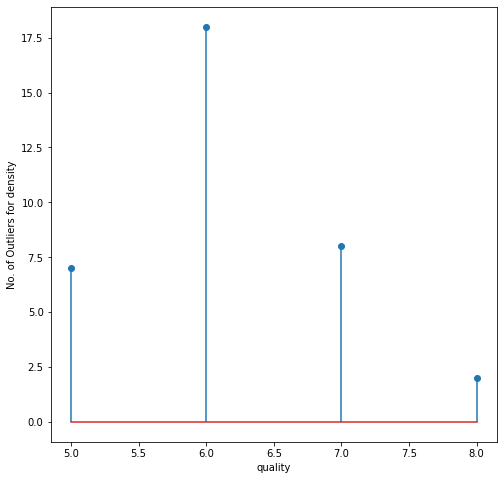

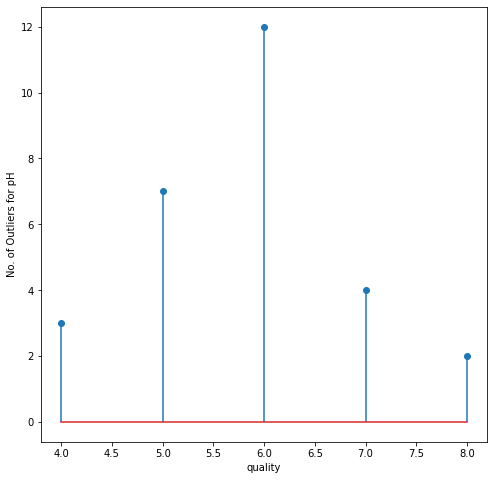

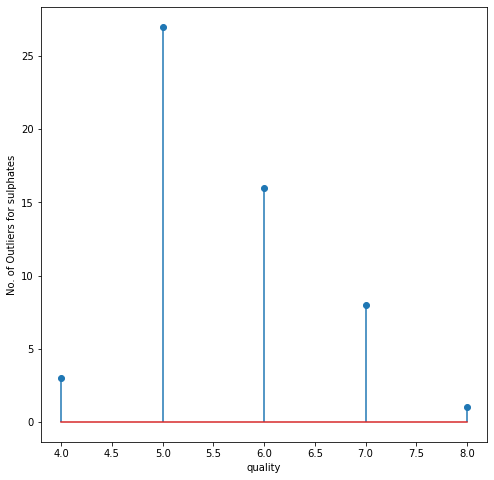

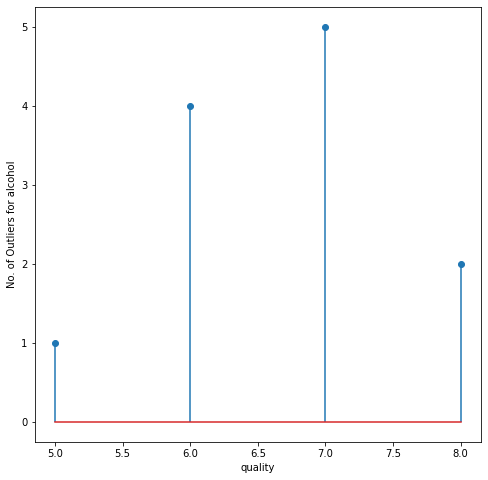

In [10]:
def Outliers(data):
    for feature in data.columns[:-1]:
        d = data[feature]
        iqr = d.quantile(0.75) - d.quantile(0.25)
        Min = d.quantile(0.25) - 1.5*iqr
        Max = d.quantile(0.75) + 1.5*iqr 
        outliers = data[(d > Max ) | ( d < Min )]
        p = outliers.groupby(by = 'quality').count().reset_index()
        plt.figure(figsize = (8,8))
        plt.stem(p['quality'] ,p[feature])
        plt.ylabel("No. of Outliers for " + feature)
        plt.xlabel('quality')
        print('Total outliers for ' + feature + " feature : " + str(outliers[feature].count()))
        
Outliers(wineData)

### Preproccessing

In [11]:
X_arr = wineData.drop('quality', axis = 1).values
X_arr

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tran = scaler.fit_transform(X_arr)
X = pd.DataFrame(X_tran, columns = wineData.columns[:-1])
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374


 - Feature's data have been Standardized
 - No encoding required

In [25]:
wineData.corr().loc['quality', :]

fixed acidity           0.119024
volatile acidity       -0.395214
citric acid             0.228057
residual sugar          0.013640
chlorides              -0.130988
free sulfur dioxide    -0.050463
total sulfur dioxide   -0.177855
density                -0.184252
pH                     -0.055245
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:>

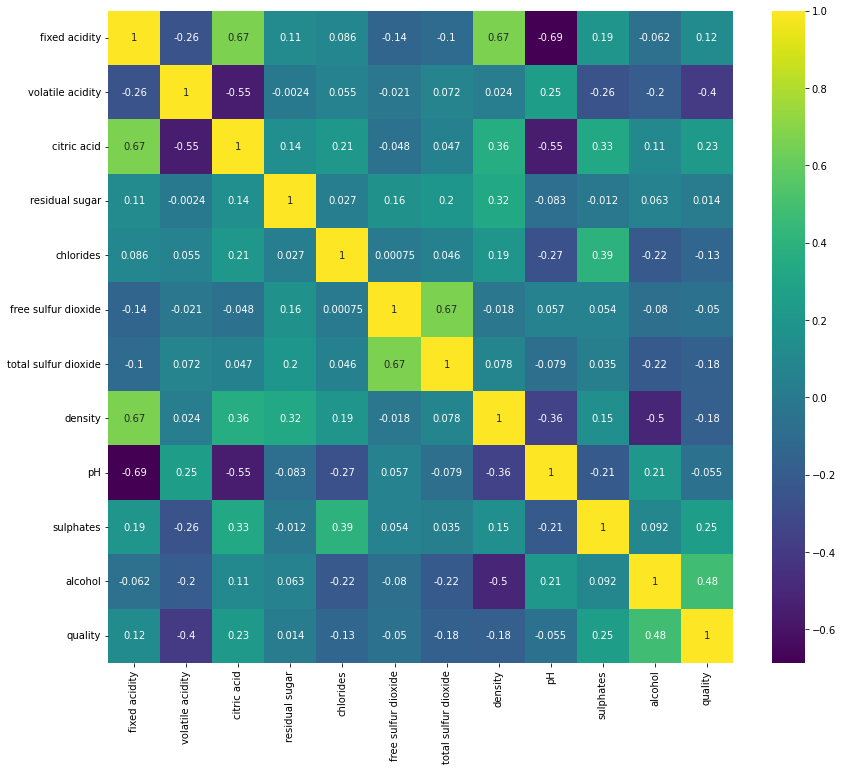

In [14]:
plt.figure(figsize = (14,12))
sns.heatmap(data = wineData.corr(), cmap = 'viridis', annot= True )

### Linear Regression model

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
predictions = lm.predict(X_test)

In [18]:
from sklearn import metrics
print("Mabs error   : " + str(metrics.mean_absolute_error(y_test, predictions)))
print("M sqrd error : " + str(metrics.mean_squared_error(y_test, predictions)))
print("RMS error    : " + str(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

Mabs error   : 0.48785271631915605
M sqrd error : 0.41520626418932594
RMS error    : 0.6443650085078534


### Improving model by removing the outliers

In [19]:
index = wineData['fixed acidity'] > 0 
for feature in wineData.columns[:-1]:
    d = wineData[feature]
    iqr = d.quantile(0.75) - d.quantile(0.25)
    Min = d.quantile(0.25) - 1.5*iqr
    Max = d.quantile(0.75) + 1.5*iqr 
    index = ((d <= Max) & (d >= Min)) & index 
    
newData = wineData[index]

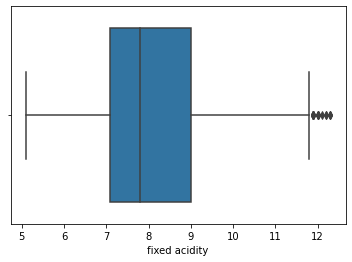

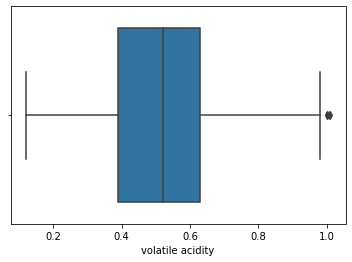

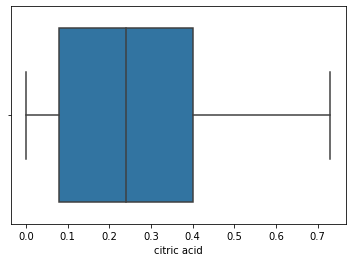

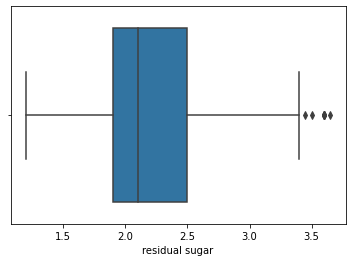

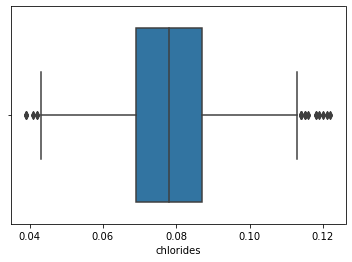

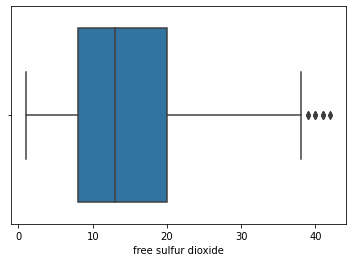

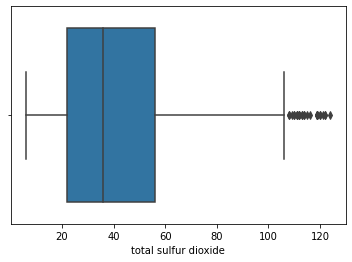

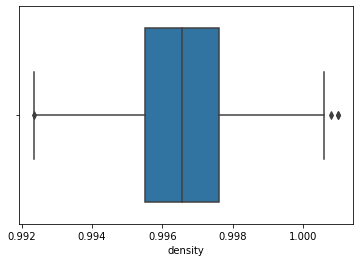

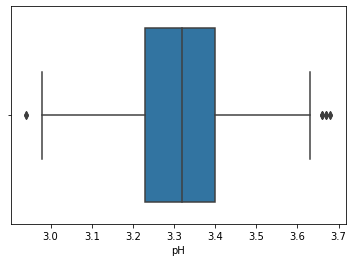

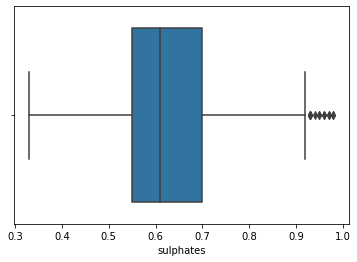

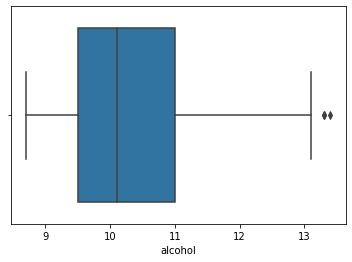

In [20]:
for feature in newData.columns[:-1]:
    plt.figure()
    sns.boxplot(x = feature, data = newData)

In [21]:
X_arr = newData.drop('quality', axis = 1).values
y = newData['quality']

scaler = StandardScaler()
X_tran = scaler.fit_transform(X_arr)
X = pd.DataFrame(X_tran, columns = wineData.columns[:-1])
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.522178,1.061042,-1.376357,-0.661123,-0.163865,-0.448210,-0.315211,0.775525,1.415708,-0.620504,-0.994033
1,-0.250872,2.137073,-1.376357,0.887576,1.306135,1.136466,0.924797,0.156543,-0.923491,0.424753,-0.590761
2,-0.250872,1.419719,-1.156846,0.223848,0.905226,0.004554,0.436309,0.280340,-0.470743,0.163439,-0.590761
3,2.055231,-1.449696,1.696791,-0.661123,-0.230683,0.230937,0.661765,0.899321,-1.225323,-0.446294,-0.590761
4,-0.522178,0.821924,-1.376357,-0.882366,-0.230683,-0.221828,-0.089755,0.775525,1.415708,-0.620504,-0.994033


In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
predictions = lm.predict(X_test)

In [24]:
print("Mabs error   : " + str(metrics.mean_absolute_error(y_test, predictions)))
print("M sqrd error : " + str(metrics.mean_squared_error(y_test, predictions)))
print("RMS error    : " + str(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

Mabs error   : 0.46983291326230986
M sqrd error : 0.35429656982137736
RMS error    : 0.5952281661861923
